# Graphs representing blacklisting in network for growing magnitude of lies

This notebook allows us to create graphs showing how many liars are blacklisted, given a growing the average discreptancy between the true latencies and the lies influencing individual nodes.

The data for these graphs can be collected using the go test **TestVarSizeLiesGraphCreation**.

 The generated graphs can be found under python_graphs/var_lies/graphs/percentage.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs
withSuspects = True  #use enhanced blacklisting algorithm
singleVictim = False #liars target single victim
coordinated = False  #liars coordinate (their lies do not contradict each other)
nbNodes = 100
nbLiars = 33
maxLatency = [600, 650, 700, 750, 800, 850, 900]
    #the maximum amount by which a lie deviates from the corresponding latency's true value

nbVictims = "all"
if singleVictim:
    nbVictims = "one"

coord = "coordinated"
if not coordinated:
    coord = "uncoordinated"


filename = "test_" + str(nbNodes) + "_nodes_" + str(nbLiars) + "_liars_attack_" + nbVictims +\
    "_distance_" + str(maxLatency[0]) + "_to_" + str(maxLatency[len(maxLatency)-1]) + "_" + coord

if withSuspects:
    filename += "_with_suspects"

In [3]:
data = pd.read_csv("data/var_lie_size/"+filename+".csv")
data

,max_lie_latency,is_liar,is_blacklisted
0,600,true,false
1,600,true,false
2,600,true,false
3,600,true,false
4,600,true,false
5,600,true,false
6,600,true,false
7,600,true,false
8,600,true,false
9,600,true,false


In [4]:
df1 = data.copy()[data["is_liar"] == "true"]
df1b = df1.copy()[df1["is_blacklisted"] == "true"]

In [5]:
df2 = df1[["max_lie_latency"]]
df2b = df1b[["max_lie_latency"]]

In [6]:
df2["total"] = 1
df2b["count"] = 1

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df3 = df2.groupby("max_lie_latency").count().reset_index()
df3b = df2b.groupby("max_lie_latency").count().reset_index()

In [8]:
df3b

,max_lie_latency,count


In [9]:
df3b["proportion"] = df3b["count"]/nbLiars

In [10]:
df3b

,max_lie_latency,count,proportion


TypeError: Empty 'DataFrame': no numeric data to plot

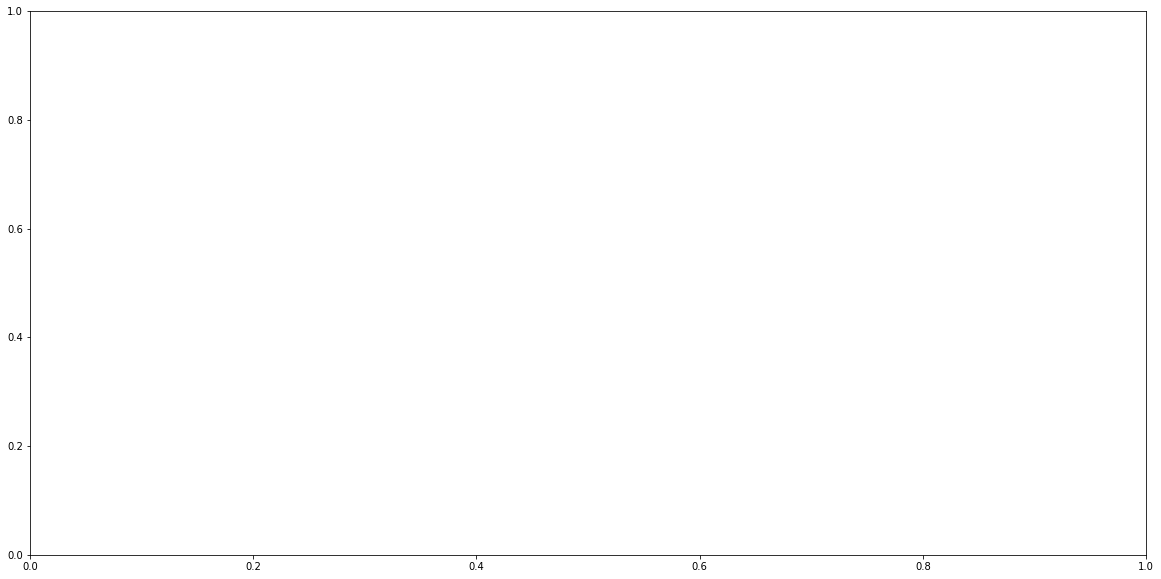

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
df3b.plot(ax=ax, kind='bar', x='max_lie_latency', y='proportion')
plt.title("Proportion of blacklisted malicious nodes according to the divergence between true and crafted latencies")
plt.xlabel("magnitude of divergence between true and crafted latencies [microseconds]")
plt.ylabel("proportion of blacklisted malicious nodes")

plt.show()

In [ ]:
fig.savefig("graphs/var_lie_size/"+filename +".png")